In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/without_rules.csv')
df

,Id,Age,Gender,Subscription,Videos Watched
0,id1,25+,Male,B,7
1,id2,25+,Female,B,20
2,id3,<25,Female,A,178
3,id4,25+,Female,A,31
4,id5,25+,Female,A,36
...,...,...,...,...,...
995,id996,<25,Female,B,243
996,id997,<25,Male,A,159
997,id998,<25,Female,A,197
998,id999,<25,Female,B,179


In [2]:
df_only_A = df[df['Subscription']=='A']
df_only_A

,Id,Age,Gender,Subscription,Videos Watched
2,id3,<25,Female,A,178
3,id4,25+,Female,A,31
4,id5,25+,Female,A,36
5,id6,25+,Female,A,29
7,id8,<25,Male,A,153
...,...,...,...,...,...
992,id993,25+,Male,A,8
993,id994,<25,Female,A,174
996,id997,<25,Male,A,159
997,id998,<25,Female,A,197


In [3]:
df_only_B = df[df['Subscription']=='B']
df_only_B

,Id,Age,Gender,Subscription,Videos Watched
0,id1,25+,Male,B,7
1,id2,25+,Female,B,20
6,id7,<25,Male,B,156
8,id9,<25,Female,B,92
10,id11,<25,Female,B,135
...,...,...,...,...,...
989,id990,<25,Female,B,104
990,id991,25+,Male,B,26
994,id995,<25,Female,B,71
995,id996,<25,Female,B,243


#синий

##ПОБЕДА A

In [4]:
#победа А
df_head_A = df_only_A.sort_values(by = 'Videos Watched', ascending=False).head(200)
df_tail_B = df_only_B.sort_values(by = 'Videos Watched', ascending=False).tail(200)

winA1 = pd.concat([df_head_A,df_tail_B])

In [5]:
df['Selection Winner A'] = df['Id'].apply(lambda x: 1 if x in list(winA1['Id']) else 0)
df

,Id,Age,Gender,Subscription,Videos Watched,Selection Winner A
0,id1,25+,Male,B,7,1
1,id2,25+,Female,B,20,1
2,id3,<25,Female,A,178,1
3,id4,25+,Female,A,31,0
4,id5,25+,Female,A,36,0
...,...,...,...,...,...,...
995,id996,<25,Female,B,243,0
996,id997,<25,Male,A,159,1
997,id998,<25,Female,A,197,1
998,id999,<25,Female,B,179,0


In [6]:
winA1_group = winA1.groupby(['Subscription'])['Videos Watched'].agg('mean')
winA1_group

,Videos Watched
Subscription,
A,216.32
B,30.16


<ipython-input-7-db04105c0b15>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  height = [winA1[df['Subscription'] == 'A']['Videos Watched'].mean(), winA1[df['Subscription'] == 'B']['Videos Watched'].mean()],
<ipython-input-7-db04105c0b15>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  height = [winA1[df['Subscription'] == 'A']['Videos Watched'].mean(), winA1[df['Subscription'] == 'B']['Videos Watched'].mean()],


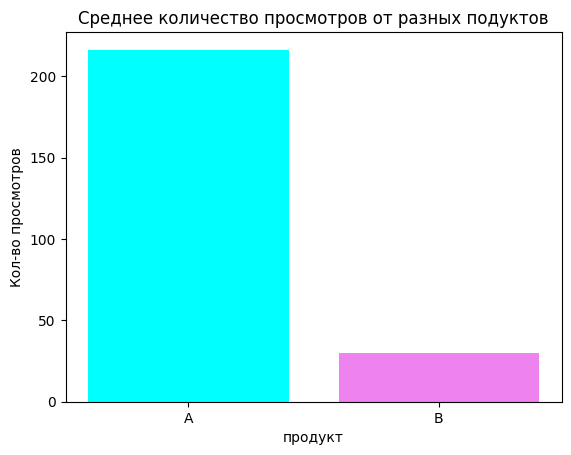

In [7]:
plt.bar(
    x = winA1['Subscription'].unique(),
    height = [winA1[df['Subscription'] == 'A']['Videos Watched'].mean(), winA1[df['Subscription'] == 'B']['Videos Watched'].mean()],
    color = ['cyan', 'violet']
)#,'violet'])

plt.title('Среднее количество просмотров от разных подуктов')
plt.xlabel('продукт')
plt.ylabel('Кол-во просмотров')
plt.show()

##ПОБЕДА Б

In [8]:
#победа B
df_head_B = df_only_B.sort_values(by = 'Videos Watched', ascending=False).head(200)
df_tail_A = df_only_A.sort_values(by = 'Videos Watched', ascending=False).tail(200)


winB1 = pd.concat([df_tail_A, df_head_B])

In [9]:
df['Selection Winner B'] = df['Id'].apply(lambda x: 1 if x in list(winB1['Id']) else 0)
df

,Id,Age,Gender,Subscription,Videos Watched,Selection Winner A,Selection Winner B
0,id1,25+,Male,B,7,1,0
1,id2,25+,Female,B,20,1,0
2,id3,<25,Female,A,178,1,0
3,id4,25+,Female,A,31,0,1
4,id5,25+,Female,A,36,0,1
...,...,...,...,...,...,...,...
995,id996,<25,Female,B,243,0,1
996,id997,<25,Male,A,159,1,0
997,id998,<25,Female,A,197,1,0
998,id999,<25,Female,B,179,0,1


<ipython-input-10-b327bc54b00f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  height = [winB1[df['Subscription'] == 'A']['Videos Watched'].mean(), winB1[df['Subscription'] == 'B']['Videos Watched'].mean()],
<ipython-input-10-b327bc54b00f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  height = [winB1[df['Subscription'] == 'A']['Videos Watched'].mean(), winB1[df['Subscription'] == 'B']['Videos Watched'].mean()],


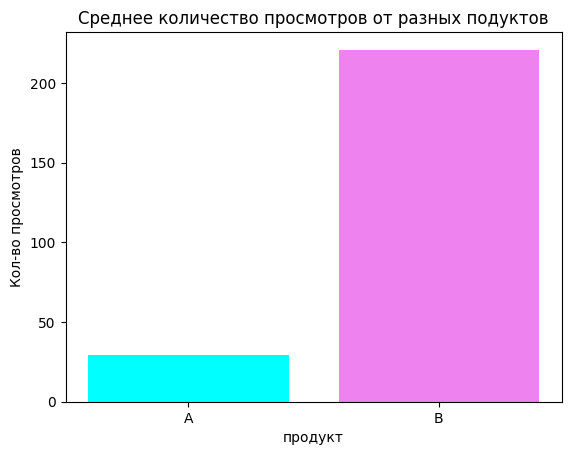

In [10]:
plt.bar(
    x = winB1['Subscription'].unique(),
    height = [winB1[df['Subscription'] == 'A']['Videos Watched'].mean(), winB1[df['Subscription'] == 'B']['Videos Watched'].mean()],
    color = ['cyan', 'violet']
)#,'violet'])

plt.title('Среднее количество просмотров от разных подуктов')
plt.xlabel('продукт')
plt.ylabel('Кол-во просмотров')
plt.show()

#красный


In [11]:
def otbor_red(df, head_tail):
  length = 50
  df = df.sort_values('Videos Watched', ascending= False)
  k=0

  for gen in ('Male', 'Female'):
    for age in ('<25', '25+'):
      Gen_Age_group = df [(df['Age'] == age) & (df['Gender'] == gen)]

      if k == 0:
        k+=1
        if head_tail == 'head':
          res = Gen_Age_group.head(int(length))
        if head_tail == 'tail':
          res = Gen_Age_group.tail(int(length))

      else:
        if head_tail == 'head':
          res = pd.concat([res, Gen_Age_group.head(int(length))])

        elif head_tail == 'tail':
          res = pd.concat([res, Gen_Age_group.tail(int(length))])

  return res

##побеждает А


In [12]:
df_red_Awin = otbor_red(df_only_A, 'head')
df_red_Awin = pd.concat([df_red_Awin, otbor_red(df_only_B, 'tail')])
df_red_Awin

,Id,Age,Gender,Subscription,Videos Watched
365,id366,<25,Male,A,425
568,id569,<25,Male,A,324
138,id139,<25,Male,A,323
550,id551,<25,Male,A,322
360,id361,<25,Male,A,321
...,...,...,...,...,...
308,id309,25+,Female,B,9
741,id742,25+,Female,B,8
644,id645,25+,Female,B,7
553,id554,25+,Female,B,4


In [13]:
gruped_A_Awin_red = df_red_Awin[df_red_Awin['Subscription'] == 'A'].groupby(['Age','Gender'])['Videos Watched'].agg('mean')
gruped_B_Awin_red = df_red_Awin[df_red_Awin['Subscription'] == 'B'].groupby(['Age','Gender'])['Videos Watched'].agg('mean')

a_red_list = [a for a in gruped_A_Awin_red]
b_red_list = [a for a in gruped_B_Awin_red]

list_bar_name = gruped_A_Awin_red.index.to_list()
list_bar_name = [str(' '.join(x)) for x in list_bar_name]

<BarContainer object of 4 artists>

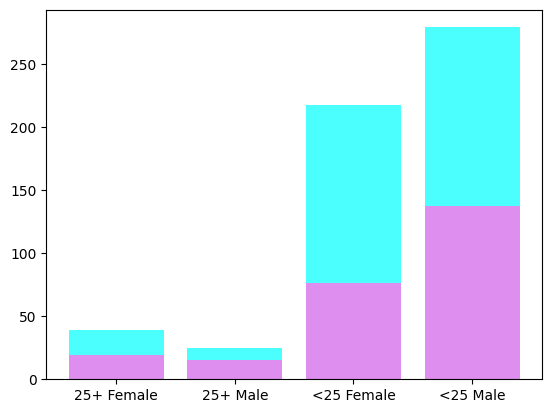

In [16]:
plt.bar(
    x = list_bar_name,
    height= a_red_list,
    color = 'cyan',
    alpha = 0.7
)

plt.bar(
    x = list_bar_name,
    height= b_red_list,
    color = 'violet',
    alpha = 0.9,

)

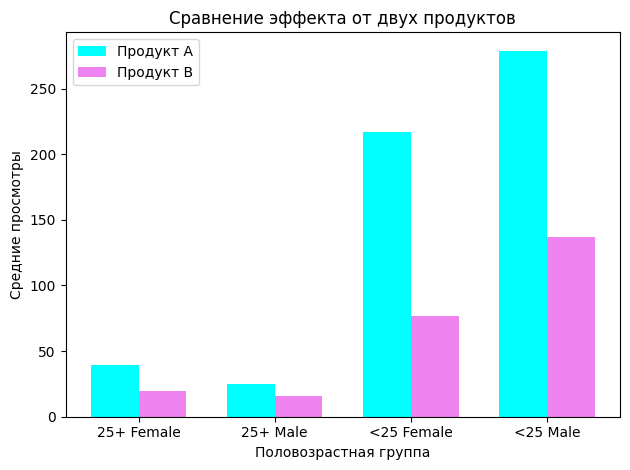

In [17]:
import numpy as np



x = np.arange(4)  # Местоположение меток на оси X
width = 0.35  # Ширина столбцов

# Создание графика
fig, ax = plt.subplots()

# Добавление первого графика
bars1 = ax.bar(x - width/2, a_red_list, width, label='Продукт A', color='cyan')

# Добавление второго графика
bars2 = ax.bar(x + width/2, b_red_list, width, label='Продукт B', color='violet')



# Настройка осей и заголовка
ax.set_xlabel('Половозрастная группа')
ax.set_ylabel('Средние просмотры')
ax.set_title('Сравнение эффекта от двух продуктов')
ax.set_xticks(x)
ax.set_xticklabels(list_bar_name)
ax.legend()

# Показать график
plt.tight_layout()  # Для лучшего отображения
plt.show()


##побеждает В

In [18]:
df_red_Bwin = otbor_red(df_only_B, 'head')
df_red_Bwin = pd.concat([df_red_Bwin, otbor_red(df_only_A, 'tail')])
df_red_Bwin

,Id,Age,Gender,Subscription,Videos Watched
589,id590,<25,Male,B,416
14,id15,<25,Male,B,392
114,id115,<25,Male,B,355
889,id890,<25,Male,B,338
319,id320,<25,Male,B,332
...,...,...,...,...,...
919,id920,25+,Female,A,11
403,id404,25+,Female,A,11
983,id984,25+,Female,A,11
283,id284,25+,Female,A,8


In [19]:
gruped_A_Bwin_red = df_red_Bwin[df_red_Bwin['Subscription'] == 'A'].groupby(['Age','Gender'])['Videos Watched'].agg('mean')
gruped_B_Bwin_red = df_red_Bwin[df_red_Bwin['Subscription'] == 'B'].groupby(['Age','Gender'])['Videos Watched'].agg('mean')

a_red_list2 = [a for a in gruped_A_Bwin_red]
b_red_list2 = [a for a in gruped_B_Bwin_red]

list_bar_name2 = gruped_A_Bwin_red.index.to_list()
list_bar_name2 = [str(''.join(x)) for x in list_bar_name]

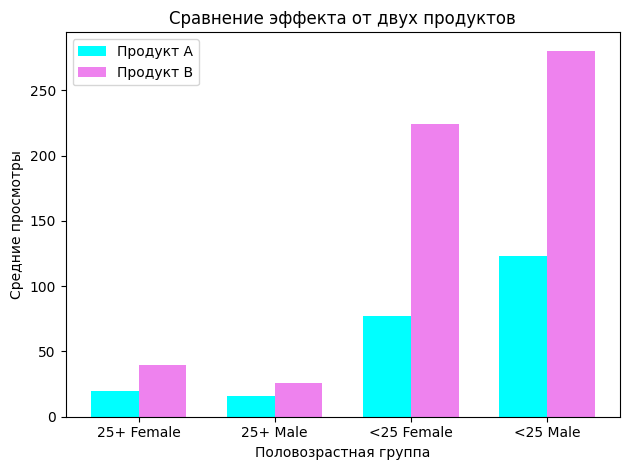

In [20]:
x = np.arange(4)  # Местоположение меток на оси X
width = 0.35  # Ширина столбцов

# Создание графика
fig, ax = plt.subplots()

# Добавление первого графика
bars1 = ax.bar(x - width/2, a_red_list2, width, label='Продукт A', color='cyan')

# Добавление второго графика
bars2 = ax.bar(x + width/2, b_red_list2, width, label='Продукт B', color='violet')



# Настройка осей и заголовка
ax.set_xlabel('Половозрастная группа')
ax.set_ylabel('Средние просмотры')
ax.set_title('Сравнение эффекта от двух продуктов')
ax.set_xticks(x)
ax.set_xticklabels(list_bar_name2)
ax.legend()

# Показать график
plt.tight_layout()  # Для лучшего отображения
plt.show()

#черный

In [24]:
def otbor_black(df, head_tail):
  df = df.sort_values('Videos Watched', ascending= False)
  k=0
  for gen in ('Male', 'Female'):
    for age in ('<25', '25+'):
      Gen_Age_group = df [(df['Age'] == age) & (df['Gender'] == gen)]
      length = len(df [(df['Age'] == age)   &   (df['Gender'] == gen)]) /5 *2

      if k == 0:
        k+=1
        if head_tail == 'head':
          res = Gen_Age_group.head(int(length))
        if head_tail == 'tail':
          res = Gen_Age_group.tail(int(length))

      else:
        if head_tail == 'head':
          res = pd.concat([res, Gen_Age_group.head(int(length))])

        elif head_tail == 'tail':
          res = pd.concat([res, Gen_Age_group.tail(int(length))])

  return res

##победа А черный


In [23]:
df_black_Awin = otbor_black(df_only_A, 'head')
df_black_Awin = pd.concat([df_black_Awin, otbor_black(df_only_B, 'tail')])
df_black_Awin

,Id,Age,Gender,Subscription,Videos Watched
365,id366,<25,Male,A,425
568,id569,<25,Male,A,324
138,id139,<25,Male,A,323
550,id551,<25,Male,A,322
360,id361,<25,Male,A,321
...,...,...,...,...,...
308,id309,25+,Female,B,9
741,id742,25+,Female,B,8
644,id645,25+,Female,B,7
553,id554,25+,Female,B,4


In [26]:
gruped_A_Awin_black = df_black_Awin[df_black_Awin['Subscription'] == 'A'].groupby(['Age','Gender'])['Videos Watched'].agg('mean')
gruped_B_Awin_black = df_black_Awin[df_black_Awin['Subscription'] == 'B'].groupby(['Age','Gender'])['Videos Watched'].agg('mean')

a_black_list = [a for a in gruped_A_Awin_black]
b_black_list = [a for a in gruped_B_Awin_black]

list_bar_name = gruped_A_Awin_black.index.to_list()
list_bar_name = [str(' '.join(x)) for x in list_bar_name]

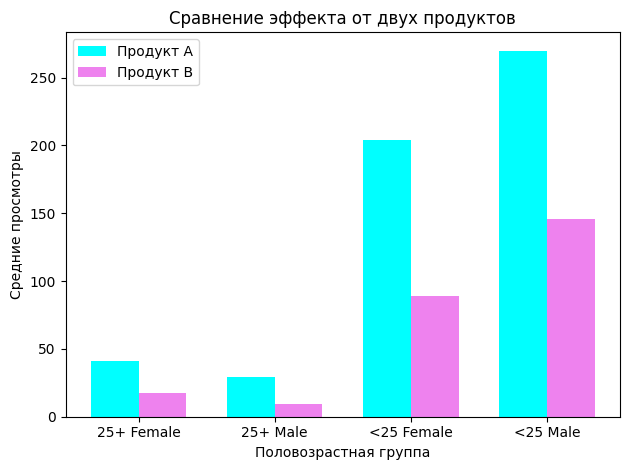

In [27]:
x = np.arange(4)  # Местоположение меток на оси X
width = 0.35  # Ширина столбцов

# Создание графика
fig, ax = plt.subplots()

# Добавление первого графика
bars1 = ax.bar(x - width/2, a_black_list, width, label='Продукт A', color='cyan')

# Добавление второго графика
bars2 = ax.bar(x + width/2, b_black_list, width, label='Продукт B', color='violet')



# Настройка осей и заголовка
ax.set_xlabel('Половозрастная группа')
ax.set_ylabel('Средние просмотры')
ax.set_title('Сравнение эффекта от двух продуктов')
ax.set_xticks(x)
ax.set_xticklabels(list_bar_name)
ax.legend()

# Показать график
plt.tight_layout()  # Для лучшего отображения
plt.show()

##побеждает В черный


In [32]:
df_black_Bwin = otbor_black(df_only_B, 'head')
df_black_Bwin = pd.concat([df_black_Bwin, otbor_black(df_only_A, 'tail')])
df_black_Bwin

,Id,Age,Gender,Subscription,Videos Watched
589,id590,<25,Male,B,416
14,id15,<25,Male,B,392
114,id115,<25,Male,B,355
889,id890,<25,Male,B,338
319,id320,<25,Male,B,332
...,...,...,...,...,...
919,id920,25+,Female,A,11
403,id404,25+,Female,A,11
983,id984,25+,Female,A,11
283,id284,25+,Female,A,8


In [33]:
gruped_A_Bwin_black = df_black_Bwin[df_black_Bwin['Subscription'] == 'A'].groupby(['Age','Gender'])['Videos Watched'].agg('mean')
gruped_B_Bwin_black = df_black_Bwin[df_black_Bwin['Subscription'] == 'B'].groupby(['Age','Gender'])['Videos Watched'].agg('mean')

a_black_list2 = [a for a in gruped_A_Bwin_black]
b_black_list2 = [a for a in gruped_B_Bwin_black]

list_bar_name2 = gruped_A_Bwin_black.index.to_list()
list_bar_name2 = [str(''.join(x)) for x in list_bar_name2]

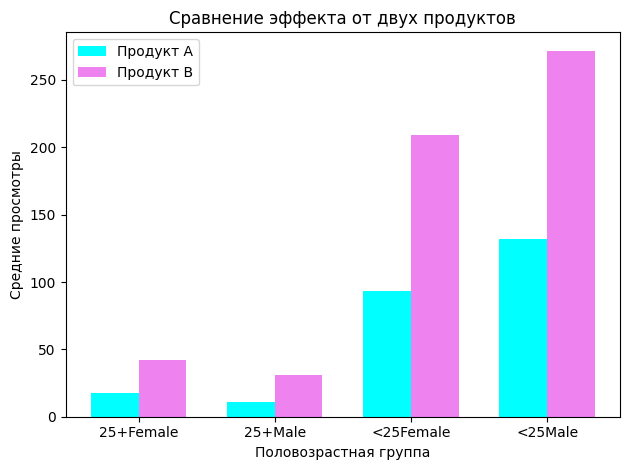

In [34]:
x = np.arange(4)  # Местоположение меток на оси X
width = 0.35  # Ширина столбцов

# Создание графика
fig, ax = plt.subplots()

# Добавление первого графика
bars1 = ax.bar(x - width/2, a_black_list2, width, label='Продукт A', color='cyan')

# Добавление второго графика
bars2 = ax.bar(x + width/2, b_black_list2, width, label='Продукт B', color='violet')



# Настройка осей и заголовка
ax.set_xlabel('Половозрастная группа')
ax.set_ylabel('Средние просмотры')
ax.set_title('Сравнение эффекта от двух продуктов')
ax.set_xticks(x)
ax.set_xticklabels(list_bar_name2)
ax.legend()

# Показать график
plt.tight_layout()  # Для лучшего отображения
plt.show()